## Lab | Random Forests

For this lab, you will be using the CSV files provided in the files_for_lab folder. These are cleaned versions of the learningSet data from the Case Study 'Healthcare for All'.

### Instructions

* Apply the Random Forests algorithm but this time only by upscaling the data.
* Use Feature Selections that you have learned in class to decide if you want to use all of the features (PCA, etc)
* Discuss the output and its impact in the bussiness scenario. Is the cost of a false positive equals to the cost of the false negative? How would you change your algorithm or data in order to maximize the return of the bussiness?

In [10]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score, train_test_split
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import warnings
warnings.filterwarnings('ignore')

In [11]:
numerical = pd.read_csv('numerical.csv')
categorical = pd.read_csv('categorical.csv')
targets = pd.read_csv('target.csv')

In [12]:
data = pd.concat([numerical, categorical, targets], axis = 1)
data = data.drop([83217,93811], axis=0)
category_1 = data[data['TARGET_B']==1].sample(len(data[data['TARGET_B']==0]), replace=True)
category_0 = data[data['TARGET_B']== 0 ]
data = pd.concat([category_0, category_1], axis = 0)
data = data.sample(frac =1) 
data = data.reset_index(drop=True)

In [13]:
data.head()

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2,STATE,CLUSTER,HOMEOWNR,GENDER,DATASRCE,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A,DOMAIN_B,ODATEW_YR,ODATEW_MM,DOB_YR,DOB_MM,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,MAXRDATE_MM,LASTDATE_YR,LASTDATE_MM,FIRSTDATE_YR,FIRSTDATE_MM,TARGET_B,TARGET_D
0,0,51.000000,5,3,3,2,12,15,40,11,0,2,3,4093,994,1574,99,0,0,49,51,69,2,0,20,21,0,1,1,6,10,1,0,10,0,1,10,31,37,40,33,41,45,24,38,41,20,15,28,22,14,8,7,6,17,15,33,21,14,21,8,16,29,28,42,28,11,5,49,12,7,33,173,259,14,8,4,85,81,75,0,0,0,2098,2230,6,6,12,88,95,5,0,34,63,47,27,81,19,7,2,5,21,26,7,14,44,11,0,1,0,56,85,94,99,99,13,29,4,32,32,14,8,32,54,0,8,9,70,0,81,95,97,99,4480.0,13.0,803.0,305,311,352,368,13564,26,15,17,18,16,5,1,1,1,28,12,17,18,15,7,1,1,1,14,24,28,21,78,22,36,71,16,5,5,0,0,0,5,3,0,5,26,31,8,75,61,71,52,61,48,33,26,46,67,25,9,21,5,11,24,0,2,6,0,12,8,1,1,0,0,8,19,2,1,6,12,17,6,2,2,7,4,10,4,11,0,2,5,77,6,0,120,12,17,25,21,6,15,5,4,27,1,20,10,1,2,0,7,12,1,15,21,40,22,0,2,0,3,0,0,3,2,0,0,0,1,1,0,0,56,25,34,13,19,34,84,38,6,2,18,0,29,49,54,68,32,6,9,81,5,13,0,0,1,99,0,98,99,98,12,2,4,6,23,61,6,14,79.0,13,7,3.0,10.0,10.0,3,6.076923,148022,0,2,31,CA,4,H,F,3,L,E,A,U,2,90,1,46,8,90,8,93,12,96,2,90,4,1,10.0
1,28,61.611649,2,9,0,0,14,43,31,6,5,0,9,1269,362,454,0,0,99,47,53,75,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,34,44,47,36,46,49,26,34,39,27,12,20,20,18,15,8,8,16,11,30,22,21,26,12,24,20,28,53,31,11,3,63,6,10,21,212,280,76,76,0,0,0,0,0,0,0,412,411,1,0,85,15,92,8,5,45,80,66,36,92,8,8,1,8,4,22,0,15,48,12,6,15,5,0,1,1,5,27,0,0,48,53,55,15,5,0,0,22,12,0,0,3,0,0,2,5,0.0,353.0,545.0,215,259,271,315,9706,38,18,19,11,8,3,1,2,0,27,20,24,14,9,3,1,2,0,30,6,24,15,19,81,1,70,21,0,0,0,0,0,4,5,3,29,21,25,6,63,67,80,57,78,52,67,54,98,99,6,4,5,0,13,13,0,1,7,12,17,15,9,3,10,0,10,31,1,3,6,16,3,1,2,0,5,4,4,3,6,5,0,23,62,3,1,120,22,25,39,9,2,3,0,2,20,1,20,1,0,0,0,7,14,2,43,1,31,6,0,32,2,1,0,0,0,0,0,0,0,0,1,0,0,0,94,99,0,0,0,87,62,30,18,24,2,6,15,47,67,33,0,0,0,21,26,31,0,22,21,77,3,95,94,5,2,8,10,31,75,6,14,116.0,18,8,3.0,10.0,10.0,7,6.444444,18359,1,2,57,NC,50,U,F,2,L,E,D,R,3,86,1,0,2,89,11,90,2,96,3,86,8,1,10.0
2,2,48.000000,2,2,2,0,30,17,34,9,9,1,9,1316,362,484,99,0,0,50,50,94,4,0,1,3,0,0,0,0,0,1,0,0,0,1,2,30,37,40,31,40,43,29,40,41,20,13,30,24,15,10,6,3,16,16,36,19,13,13,4,11,21,30,49,29,9,4,62,14,4,21,197,271,56,56,0,0,0,0,

In [14]:
data.isna().sum().sum()

0

In [15]:
y = data['TARGET_B']
X = data.drop(['TARGET_B', 'TARGET_D'], axis = 1)

In [16]:
numericalX = X.select_dtypes(np.number)
categoricalX = X.select_dtypes(np.object)

In [17]:
encoder = OneHotEncoder(drop='first').fit(categoricalX)
encoded_categorical = encoder.transform(categoricalX).toarray()
encoded_categorical = pd.DataFrame(encoded_categorical)
X = pd.concat([numericalX, encoded_categorical], axis = 1)
X

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2,CLUSTER,DATASRCE,DOMAIN_B,ODATEW_YR,ODATEW_MM,DOB_YR,DOB_MM,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,MAXRDATE_MM,LASTDATE_YR,LASTDATE_MM,FIRSTDATE_YR,FIRSTDATE_MM,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,0,51.000000,5,3,3,2,12,15,40,11,0,2,3,4093,994,1574,99,0,0,49,51,69,2,0,20,21,0,1,1,6,10,1,0,10,0,1,10,31,37,40,33,41,45,24,38,41,20,15,28,22,14,8,7,6,17,15,33,21,14,21,8,16,29,28,42,28,11,5,49,12,7,33,173,259,14,8,4,85,81,75,0,0,0,2098,2230,6,6,12,88,95,5,0,34,63,47,27,81,19,7,2,5,21,26,7,14,44,11,0,1,0,56,85,94,99,99,13,29,4,32,32,14,8,32,54,0,8,9,70,0,81,95,97,99,4480.0,13.0,803.0,305,311,352,368,13564,26,15,17,18,16,5,1,1,1,28,12,17,18,15,7,1,1,1,14,24,28,21,78,22,36,71,16,5,5,0,0,0,5,3,0,5,26,31,8,75,61,71,52,61,48,33,26,46,67,25,9,21,5,11,24,0,2,6,0,12,8,1,1,0,0,8,19,2,1,6,12,17,6,2,2,7,4,10,4,11,0,2,5,77,6,0,120,12,17,25,21,6,15,5,4,27,1,20,10,1,2,0,7,12,1,15,21,40,22,0,2,0,3,0,0,3,2,0,0,0,1,1,0,0,56,25,34,13,19,34,84,38,6,2,18,0,29,49,54,68,32,6,9,81,5,13,0,0,1,99,0,98,99,98,12,2,4,6,23,61,6,14,79.0,13,7,3.0,10.0,10.0,3,6.076923,148022,0,2,31,4,3,2,90,1,46,8,90,8,93,12,96,2,90,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,28,61.611649,2,9,0,0,14,43,31,6,5,0,9,1269,362,454,0,0,99,47,53,75,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,34,44,47,36,46,49,26,34,39,27,12,20,20,18,15,8,8,16,11,30,22,21,26,12,24,20,28,53,31,11,3,63,6,10,21,212,280,76,76,0,0,0,0,0,0,0,412,411,1,0,85,15,92,8,5,45,80,66,36,92,8,8,1,8,4,22,0,15,48,12,6,15,5,0,1,1,5,27,0,0,48,53,55,15,5,0,0,22,12,0,0,3,0,0,2,5,0.0,353.0,545.0,215,259,271,315,9706,38,18,19,11,8,3,1,2,0,27,20,24,14,9,3,1,2,0,30,6,24,15,19,81,1,70,21,0,0,0,0,0,4,5,3,29,21,25,6,63,67,80,57,78,52,67,54,98,99,6,4,5,0,13,13,0,1,7,12,17,15,9,3,10,0,10,31,1,3,6,16,3,1,2,0,5,4,4,3,6,5,0,23,62,3,1,120,22,25,39,9,2,3,0,2,20,1,20,1,0,0,0,7,14,2,43,1,31,6,0,32,2,1,0,0,0,0,0,0,0,0,1,0,0,0,94,99,0,0,0,87,62,30,18,24,2,6,15,47,67,33,0,0,0,21,26,31,0,22,21,77,3,95,94,5,2,8,10,31,75,6,14,116.0,18,8,3.0,10.0,10.0,7,6.444444,18359,1,2,57,50,2,3,86,1,0,2,89,11,90,2,96,3,86,8,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,2,48.000000,2,2,2,0,30,17,34,9,9,1,9,1316,362,484,99,0,0,50,50,94,4,0,1,3,0,0,0

In [18]:
smote = SMOTE()
transformer = StandardScaler().fit(X)
X = transformer.transform(X)
X_sm, y_sm = smote.fit_resample(X, y) 
y_sm.value_counts()

1    90567
0    90567
Name: TARGET_B, dtype: int64

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.25, random_state=0)

In [21]:
#help(RandomForestClassifier)

In [22]:
clf = RandomForestClassifier(max_depth=4, random_state=0)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

Confusion matrix
[[13341  9036]
 [ 9136 13771]]
-------------------------------------------------------
Accuracy score
0.5987103612755057
-------------------------------------------------------
Classification report
              precision    recall  f1-score   support

           0       0.59      0.60      0.59     22377
           1       0.60      0.60      0.60     22907

    accuracy                           0.60     45284
   macro avg       0.60      0.60      0.60     45284
weighted avg       0.60      0.60      0.60     45284



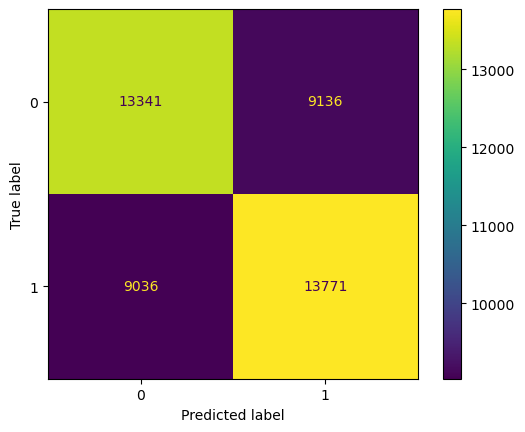

In [23]:
print('Confusion matrix')
print(confusion_matrix(predictions,y_test))
plot_confusion_matrix(clf, X_test, y_test) 
print('-------------------------------------------------------')
print('Accuracy score')
print(accuracy_score(predictions,y_test))
print('-------------------------------------------------------')
print('Classification report')
print(classification_report(predictions,y_test)) 